In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

import pickle
import os

In [2]:
data = pd.read_csv("./data/wines_dataset.csv", sep = "|")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['quality']),
                                                    data['quality'],
                                                    test_size = 0.20,
                                                    random_state=42)

c:\Users\annav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\annav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

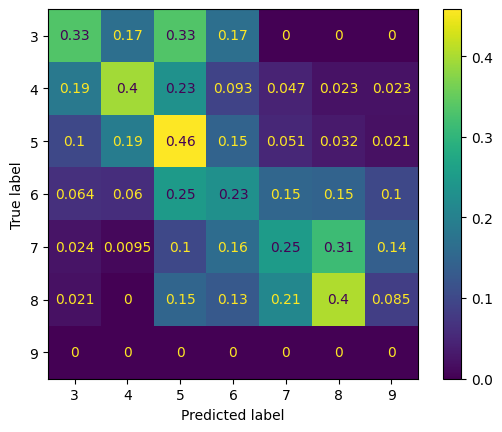

In [9]:
X_train["class"] = (X_train["class"] == "white").astype(int) # white -> clase 1, red -> clase 0
X_test["class"] = (X_test["class"] == "white").astype(int) # white -> clase 1, red -> clase 0

features_to_transform = ["chlorides","free sulfur dioxide", "total sulfur dioxide"]
for col in features_to_transform:
    desplaza = 0 
    if X_train[col].min() <= 0:
        desplaza = int(abs(X_train[col].min())) + 1
    X_train[col] = np.log(X_train[col] + desplaza)
    X_test[col] = np.log(X_test[col] + desplaza)

features_num_clf = ['class', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

#Modelo de Regresión Logistica:
lr_clf = LogisticRegression(max_iter = 1000, class_weight = "balanced")

param_grid = {
    'max_iter':[1000,10000],
    'class_weight':['balanced',False],
    
}

lr_grid = GridSearchCV(lr_clf,
                        param_grid= param_grid,
                        cv = 5,
                        scoring = "balanced_accuracy")

lr_grid.fit(X_train[features_num_clf], y_train)

y_pred = lr_grid.best_estimator_.predict(X_test[features_num_clf])
class_report = classification_report(y_test, y_pred)
conf_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = "true")


In [11]:
print(class_report)

              precision    recall  f1-score   support

           3       0.02      0.33      0.04         6
           4       0.12      0.40      0.19        43
           5       0.52      0.46      0.49       432
           6       0.54      0.23      0.32       562
           7       0.31      0.25      0.28       210
           8       0.10      0.40      0.17        47
           9       0.00      0.00      0.00         0

    accuracy                           0.32      1300
   macro avg       0.23      0.30      0.21      1300
weighted avg       0.47      0.32      0.36      1300

